# Introduction à Matplotlib

Matplotlib est une bibliothèque permettant de tracer des graphes 2D. En particulier, `pyplot` est le framework MATLAB-like. Les fonctions utilisées par matplotlib nécessitent des données de type `np.array`. Il est donc nécessaire d'importer les deux bibliothèques.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

`pyplot` propose une fonction `plot` qui permet de tracer facilement des graphes. Cette fonction accepte deux arguments : la liste des abscisses et la liste des ordonnées. Cette fonction relie les points par des segments de droite.

Le graphique sera affiché par la fonction `show()`.

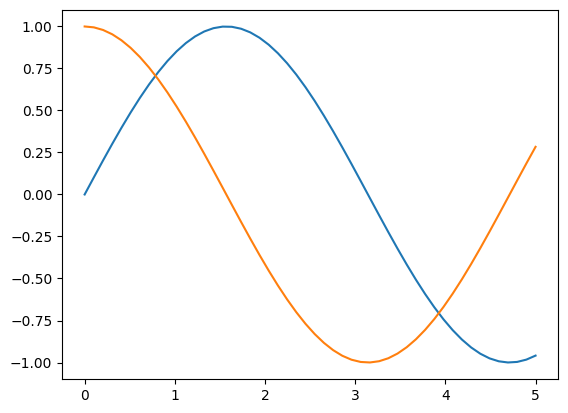

In [5]:
x = np.linspace(0, 5)
y = np.sin(x)

plt.plot(x, y)
plt.plot(x, np.cos(x))
plt.show()

Il n'y a besoin de rien de plus pour tracer des graphiques *de base*. La fonction `plot` permet de tracer un graph de points reliés par des lignes. D'autres fonctions permettent de représenter d'autres types de graphes plus adaptés pour vos données. Par exemple, ci-dessous, des notes sous forme de barres.

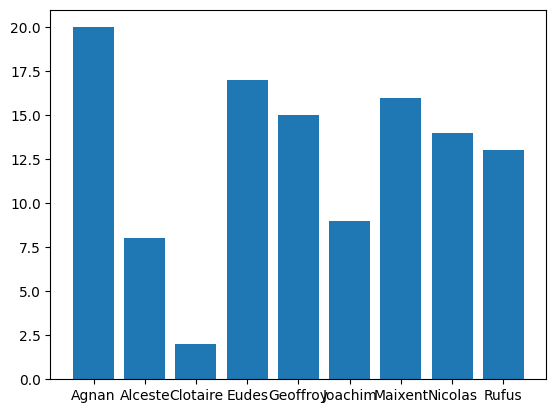

In [6]:
grades = np.array([20, 8, 2, 17, 15, 9, 16, 14, 13])
students = ['Agnan', 'Alceste', 'Clotaire', 'Eudes', 'Geoffroy', 'Joachim', 'Maixent', 'Nicolas', 'Rufus']

plt.bar(students, grades)
plt.show()

Ou des camemberts.

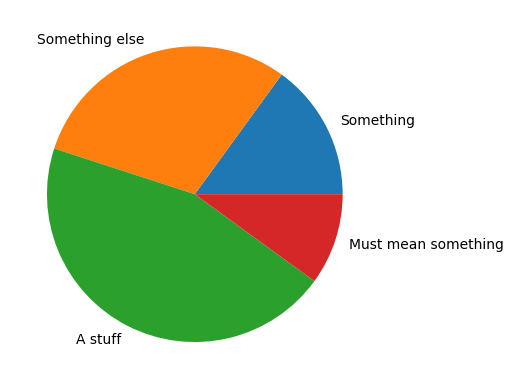

In [7]:
sizes = [15, 30, 45, 10]
labels = ['Something', 'Something else', 'A stuff', 'Must mean something']

plt.pie(sizes, labels=labels)
plt.show()

## Apparence avec plot

Nous allons rester sur les lignes.

L'apparence des graphes peut être modifié en paramétrant `plot`.

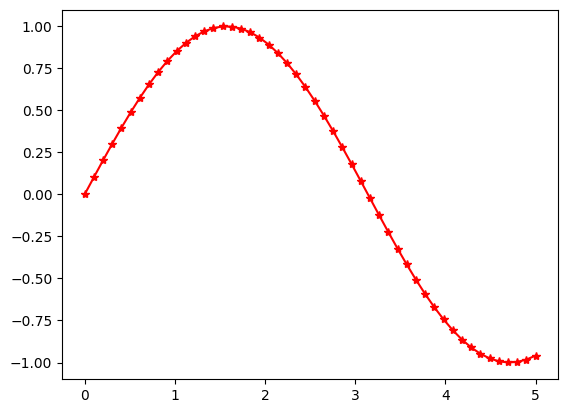

In [8]:
plt.plot(x, y, 'r*-')
plt.show()

Vous pouvez trouver la [documentation des marqueurs](https://matplotlib.org/stable/api/markers_api.html) et la [documentaiton des couleurs](https://matplotlib.org/stable/api/colors_api.html).

Il est possibe de tracer plusieurs courbes sur le même graphe. Pour cela, il suffit d'appeler la fonction `plot` pllusieurs fois.

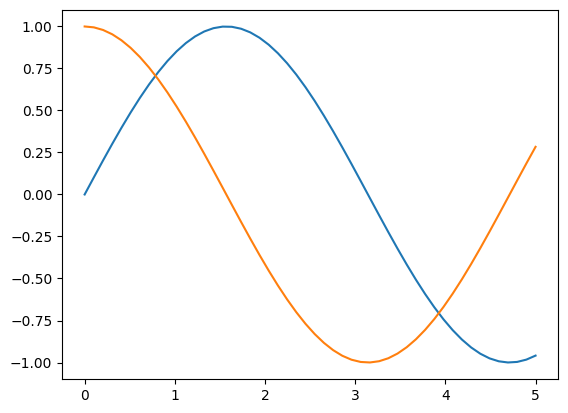

In [9]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()

Ou tout simplement de passer en un seul appel à la fonction. C'est une option *pratique* à réserver à certains cas.

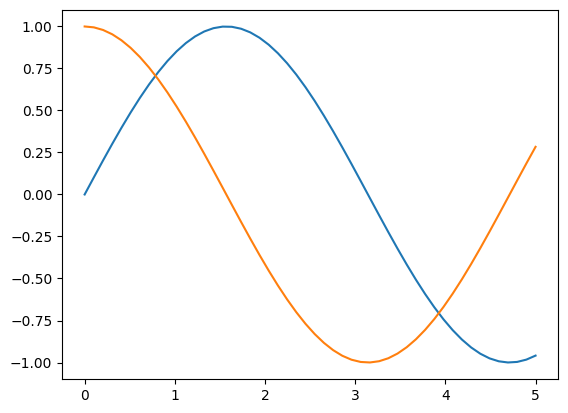

In [10]:
plt.plot(x, np.sin(x), x, np.cos(x))
plt.show()

Un graphe peut être renseigné avec le nom des axes et la légende.

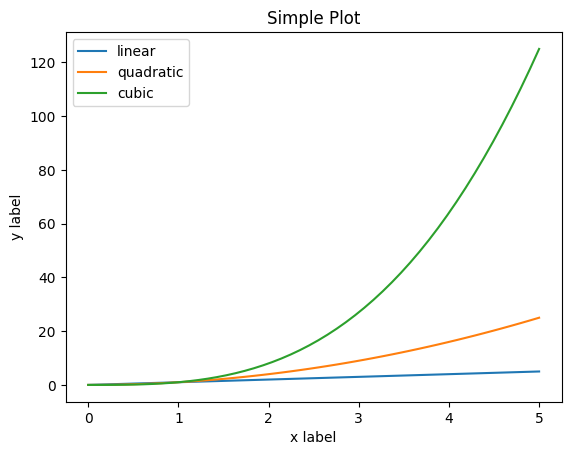

In [13]:
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

La fonction `plt.plot()` simplifie la structure manipulée. En effet, un graphique matplotlib consiste en une **figure** contenant au moins un **Axes** (notez la première lettre en capital, à ne pas confondre avec un axe, *axis*).
Jusqu'ici, nous avons laissé la fonction créer une figure et un Axes.

Mais si nous avons besoin de présenter des *graphes* distincts, nous allons devoir les déclarer.

Le code suivant crée 2 Axes en tant que `plt.subplot()`.

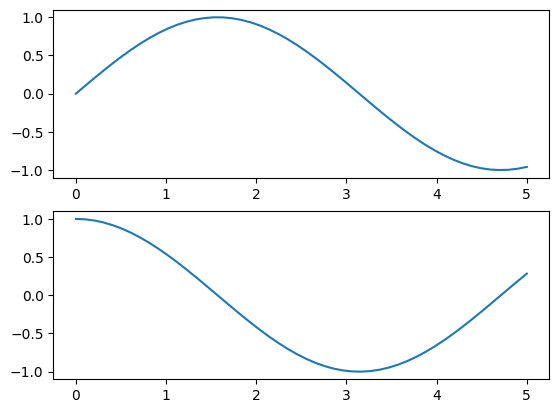

In [15]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x))
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

plt.show()

Mais pour plus de souplesse, il matplotlib offre aussi une syntaxe objet.

## La syntaxe objet
La fonction `plt.subplots()` nous retourn un N-uplet de 2 données : la figure et les Axes.

Commençons par revoir le graphe légendé sous forme objet

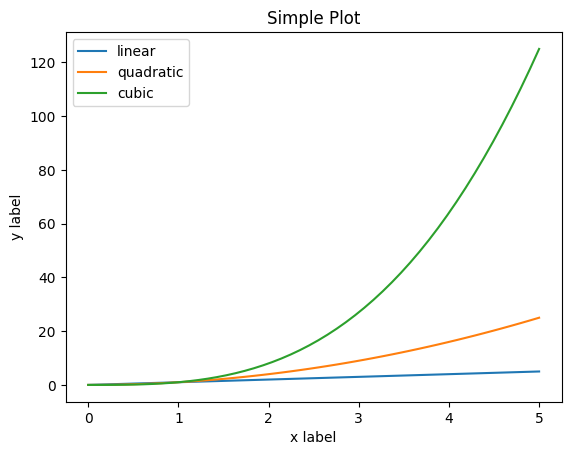

In [16]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, x, label='linear')
ax.plot(x, x**2, label='quadratic')
ax.plot(x, x**3, label='cubic')

ax.set_xlabel('x label')
ax.set_ylabel('y label')

ax.set_title("Simple Plot")

ax.legend()
plt.show()

Nous pouvons aussi travailler sur plusieurs *Axes* dans une même figure.

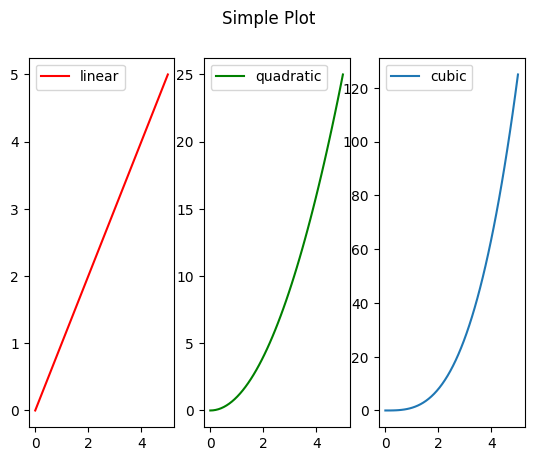

In [17]:
fig, ax_lst = plt.subplots(1, 3)

ax_lst[0].plot(x, x, 'r-', label='linear')
ax_lst[1].plot(x, x**2, 'g-', label='quadratic')
ax_lst[2].plot(x, x**3, label='cubic')

fig.suptitle("Simple Plot")
ax_lst[0].legend()
ax_lst[1].legend()
ax_lst[2].legend()
plt.show()

Par défaut, matplotlib adaptera l'affichage au mieux. On peut évidemment configurer la présentation, ici en fixant la limite de l'axe y.

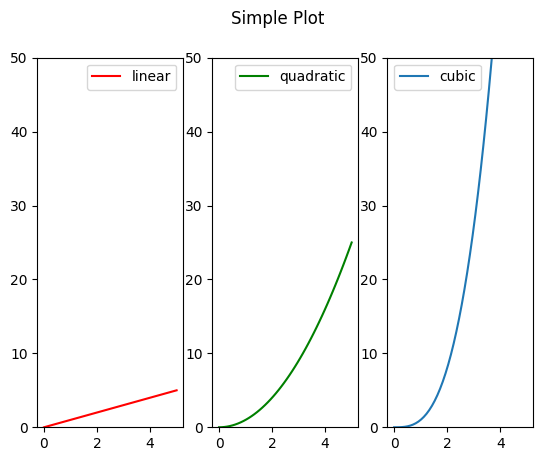

In [18]:
fig, ax_lst = plt.subplots(1, 3)

ax_lst[0].plot(x, x, 'r-', label='linear')
ax_lst[1].plot(x, x**2, 'g-', label='quadratic')
ax_lst[2].plot(x, x**3, label='cubic')

fig.suptitle("Simple Plot")
#fig.legend()

for ax in ax_lst:
    ax.legend()
    ax.set_ylim(0, 50)

Vous pouvez donc créer une fonction *helper* qui vous permet de prendre en charge l'affichage des données

Text(0.5, 0.98, 'Simple Plot')

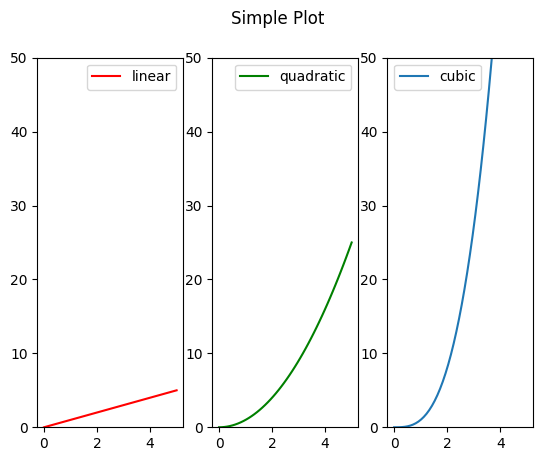

In [19]:
def my_plotter(ax, data1, data2, params: dict):
    ax.plot(data1, data2, **params)
    ax.legend()
    ax.set_ylim(0, 50)
    
fig, ax_lst = plt.subplots(1, 3)

x2 = x**2
x3 = x**3

my_plotter(ax_lst[0], x, x, {'color': 'red', 'label': 'linear'})
my_plotter(ax_lst[1], x, x2, {'color': 'green', 'label': 'quadratic'})
my_plotter(ax_lst[2], x, x3, {'label': 'cubic'})

fig.suptitle("Simple Plot")

## Autre type de graphe

### Exemple de paramétrage de l'affichage

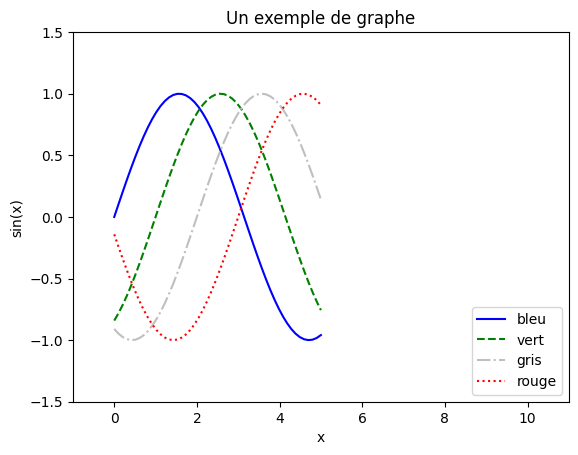

In [20]:
fig = plt.figure()
ax = plt.axes()
plt.plot(x, np.sin(x - 0), color='blue', linestyle='solid', label='bleu')
plt.plot(x, np.sin(x - 1), color='g', linestyle='dashed', label='vert')
plt.plot(x, np.sin(x - 2), color='0.75', linestyle='dashdot', label='gris')
plt.plot(x, np.sin(x - 3), color='#FF0000', linestyle='dotted', label='rouge')

plt.axis((-1, 11, -1.5, 1.5))

plt.title("Un exemple de graphe")

plt.legend(loc='lower right')

ax = ax.set(xlabel='x', ylabel='sin(x)')

### La fonction `scatter`

Text(0, 0.5, 'entry b')

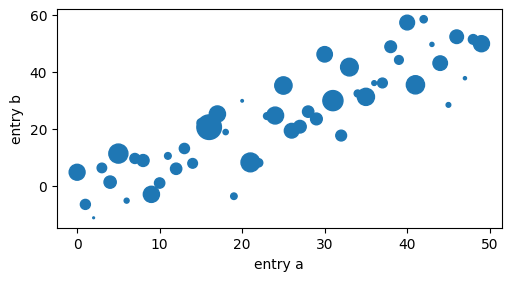

In [21]:
np.random.seed(19680801)

data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

ax.scatter('a', 'b', s='d', data=data)

ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

### Une représentation statistique avec marge d'erreur

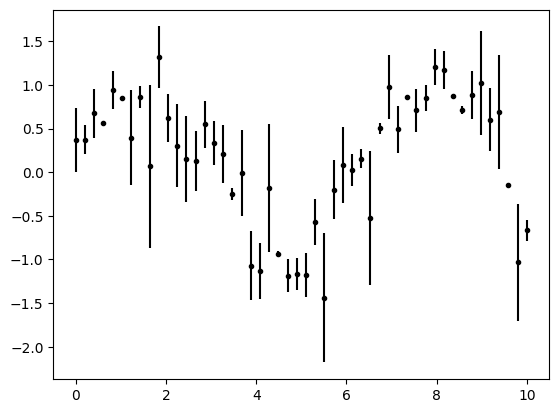

In [22]:
x = np.linspace(0, 10, 50)
y_err = np.random.randn(50) * 0.4
y = np.sin(x) + y_err

plt.errorbar(x, y, yerr=abs(y_err), fmt='.k')
#plt.plot(x, np.sin(x))
plt.show()

### Les camemberts (parce que c'est mieux que les tartes)

In [23]:
sizes = [15, 30, 45, 10]
labels = ['Something', 'Something else', 'A stuff', 'Must mean something']

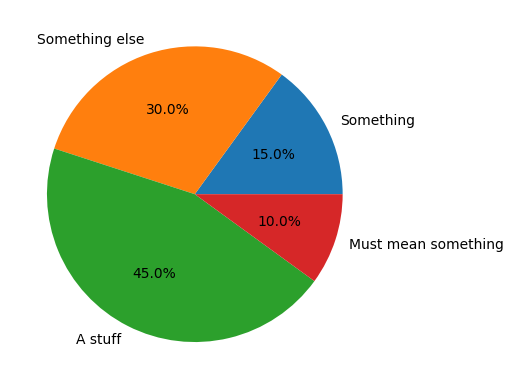

In [24]:
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.show()

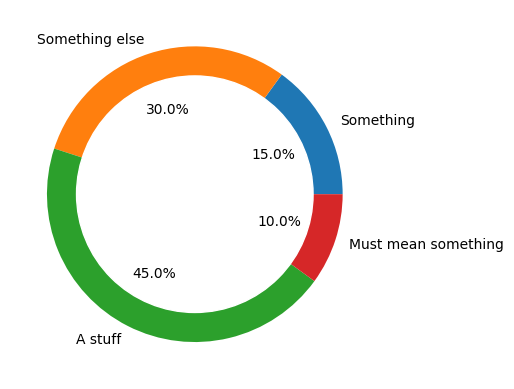

In [25]:
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
circle = plt.Circle((0, 0), 0.8, color='white')
plt.gca().add_artist(circle)
plt.show()

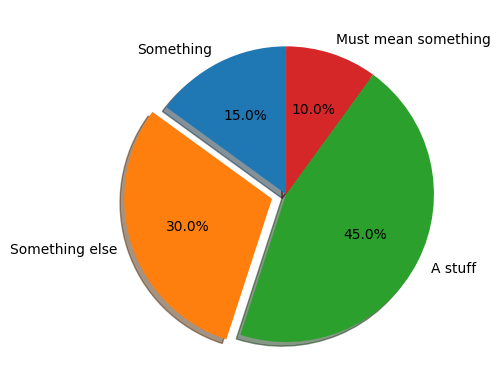

In [26]:
explode = (0, 0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)

plt.show()